In [1]:
from salishsea_tools import viz_tools
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr
import cmocean.cm as cm
import glob
import sys

In [2]:
sys.path.insert(1, '../../../../MEOPAR/tools/SalishSeaTools/salishsea_tools/')
import river_202108 as rivers

In [4]:
physics_202111 = xr.open_dataset('/ocean/cdonaldson/compare_daily_river/SalishSeaCast_day_avg_physics_20190101_20191231.nc')

Text(0.5, 0.98, 'Salinity at 0.5 m (g/kg) 202111')

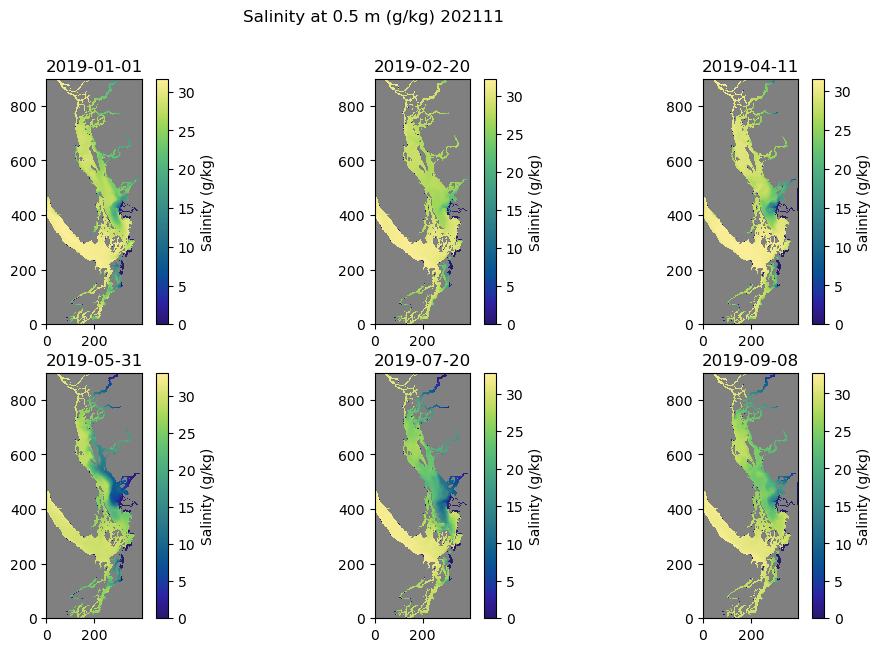

In [5]:
## PRE-PROCESSING PART
phys_arr = physics_202111.vosaline.to_numpy()

# make the indicies for plotting six sample salinity fields
plot_ind = np.array([[0,0], [0,1], [0,2], [1,0], [1,1], [1,2]])
plot_day = np.array([0, 50, 100, 150, 200, 250])  # this selects what days of each year to plot, change for > 1 year

# open the mesh mask and use it to mask the land
mesh = xr.open_dataset('../../../../MEOPAR/grid/mesh_mask201702.nc')
# the mask is 1 where there is water, we want the opposite.  The meshmask has an extra dimension, hence the [0]
tmask = 1 - mesh.tmask[0]

kd = 0 ## this will stay for surface
imin = 0
imax = 898
jmin = 0
jmax = 398
dm = physics_202111

fig1, ax1 = plt.subplots(2, 3, figsize=(12, 7))


## SHOWS SALINITY PLOTS
for i in np.arange(0,6):
    
    cmap = cm.haline
    cmap.set_bad('gray')

    
    day = plot_day[i]
    day_str = np.datetime_as_string(physics_202111.time[day].values, unit='D')
    # salinity plot
    myarray = np.ma.array(dm.vosaline[day, kd, imin:imax, jmin:jmax])
    salinity = np.ma.masked_array(myarray, mask=tmask[0])
    colours = ax1[plot_ind[i][0], plot_ind[i][1]].pcolormesh(np.arange(jmin, jmax), np.arange(imin, imax), salinity, cmap=cm.haline, shading='auto')
    ax1[plot_ind[i][0], plot_ind[i][1]].set_title(day_str)
    cb = fig1.colorbar(colours, ax=ax1[plot_ind[i][0], plot_ind[i][1]])
    cb.set_label('Salinity (g/kg)')
    viz_tools.set_aspect(ax1[plot_ind[i][0], plot_ind[i][1]]);

    
    
fig1.suptitle(f'Salinity at {kd+0.5} m (g/kg) ' + '202111')
# plt.savefig('2020_samplesal.png')



In [6]:
# define dimensions for later reshaping
num_days = phys_arr.shape[0]

Nx = phys_arr.shape[2]
Ny = phys_arr.shape[3]

## DO PCA PART
surface = phys_arr[:,0,:,:].reshape(num_days, 357404)  # TODO: FIX THIS to not hard coded
surface = np.nan_to_num(surface)

# does the PCA part
n_modes = np.min(np.shape(surface))
pca = PCA(n_components = n_modes)
PCs = pca.fit_transform(surface)
eigvecs = pca.components_
fracVar = pca.explained_variance_ratio_

#plot fraction of variance explained by each mode
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.scatter(range(len(fracVar)),fracVar, edgecolor = 'k')
plt.xlabel('Mode Number', fontsize = 20)
plt.ylabel('Fraction Variance', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.title('Variance Explained by All Modes ' + '202111', fontsize = 24)

plt.subplot(1,2,2)
n_modes_show = 10  # TODO change this to fun input
plt.scatter(range(n_modes_show),fracVar[:n_modes_show], s = 100, edgecolor = 'k')
plt.xlabel('Mode Number', fontsize = 20)
plt.ylabel('Fraction Variance', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.title('Variance Explained by First ' + str(n_modes_show) + ' Modes', fontsize = 24)

plt.tight_layout()

# if saveIt:
#     plt.savefig('tutorial4_fig3.png')

plt.show()

NameError: name 'PCA' is not defined